In [1]:
# =======================
# Common dependencies
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, auc
from math import pi

plt.rcParams["font.family"] = "Arial"
plt.rcParams["svg.fonttype"] = "none"

In [ ]:
# Figure 5C — Radar Chart
def metrics(file, auc_value):
    all_true = file['labels'].apply(lambda x: 0 if x == 'CMS0' else 1).values
    all_pred = file['preds'].apply(lambda x: 0 if x == 'CMS0' else 1).values

    tn, fp, fn, tp = confusion_matrix(all_true, all_pred).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    sen = tp / (tp + fn) if (tp + fn) else 0
    spe = tn / (tn + fp) if (tn + fp) else 0
    ppv = tp / (tp + fp) if (tp + fp) else 0
    npv = tn / (tn + fn) if (tn + fn) else 0
    return [auc_value, acc, sen, spe, ppv, npv]

def plot_model(data, color, label, alpha):
    ax.plot(angles, data, color=color, linewidth=1.5, alpha=alpha, label=label)
    ax.fill(angles, data, color=color, alpha=0.1)

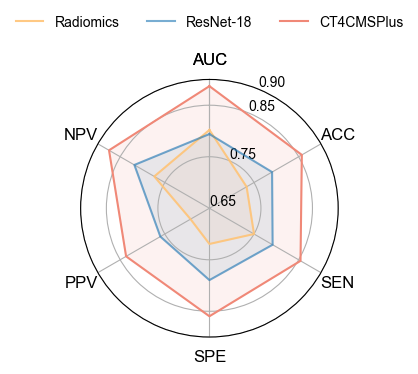

In [3]:
# Data loading and metric computation
categories = ["AUC", "ACC", "SEN", "SPE", "PPV", "NPV"]
ours_auc, radiomics_auc, resnet18_auc = 0.887, 0.802, 0.794

Ours = metrics(pd.read_csv("table/Ours_five_fold_results.csv"), ours_auc)
Radiomics = metrics(pd.read_csv("table/Radiomics_five_fold_results.csv"), radiomics_auc)
ResNet18 = metrics(pd.read_csv("table/Resnet18_five_fold_results.csv"), resnet18_auc)

# Plotting radar chart
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
categories += categories[:1]
Ours += Ours[:1]; Radiomics += Radiomics[:1]; ResNet18 += ResNet18[:1]

fig, ax = plt.subplots(figsize=(5, 4), subplot_kw={'polar': True})
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

def plot_model(data, color, label, alpha):
    ax.plot(angles, data, color=color, linewidth=1.5, alpha=alpha, label=label)
    ax.fill(angles, data, color=color, alpha=0.1)

plot_model(Radiomics, "#ffc477", "Radiomics", 0.9)
plot_model(ResNet18, "#1F77B4", "ResNet-18", 0.6)
plot_model(Ours, "#f08877", "CT4CMSPlus", 1.0)

ax.set_yticks([0.65, 0.75, 0.85, 0.9])
ax.set_ylim(0.65, 0.9)
ax.set_xticks(angles)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=3, frameon=False)
plt.tight_layout()

plt.savefig('img_plot/Radar.png', dpi=300)
plt.savefig('img_plot/Radar.svg', bbox_inches='tight')
plt.savefig('img_plot/Radar.pdf', bbox_inches='tight', dpi=300)
plt.show()